In [4]:
import pandas as pd 
import numpy as np 
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt #visualisation 
%matplotlib inline 
sns.set(color_codes=True)
from numpy import loadtxt 
from keras.models import Sequential 
from keras.layers import Dense

In [6]:
df = pd.read_csv("creditcard_2023.csv") 

In [7]:
df.head(5) 


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [8]:
df.dtypes 

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [9]:
df.shape 


(568630, 31)

In [11]:
duplicate_rows_df = df[df.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 31)


In [12]:
df.count()

id        568630
V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64

In [13]:
df = df.drop_duplicates() 
df.head(5) 


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [14]:
df.count() 

id        568630
V1        568630
V2        568630
V3        568630
V4        568630
V5        568630
V6        568630
V7        568630
V8        568630
V9        568630
V10       568630
V11       568630
V12       568630
V13       568630
V14       568630
V15       568630
V16       568630
V17       568630
V18       568630
V19       568630
V20       568630
V21       568630
V22       568630
V23       568630
V24       568630
V25       568630
V26       568630
V27       568630
V28       568630
Amount    568630
Class     568630
dtype: int64

In [15]:
print(df.isnull().sum()) 


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


<AxesSubplot:xlabel='Amount'>

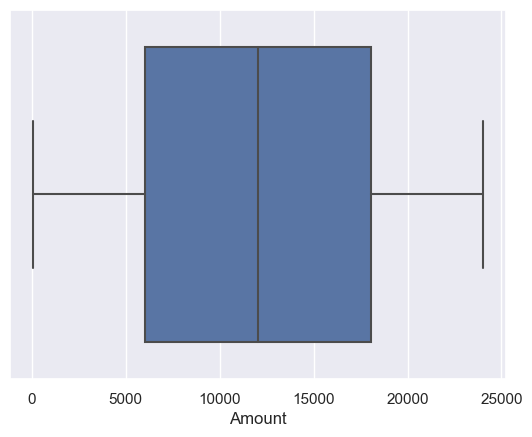

In [17]:
sns.boxplot(x=df['Amount']) 

In [32]:
fraudulent = df[df['Class'] == 1]
non_fraudulent= df[df['Class'] == 0]


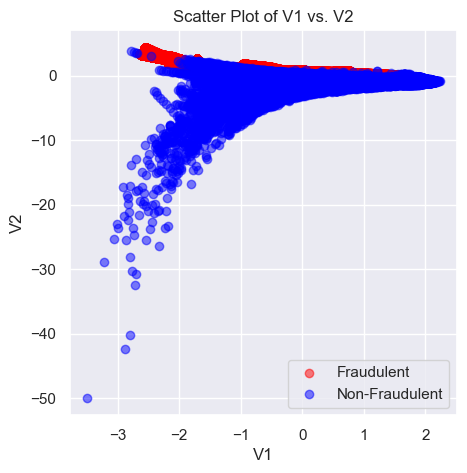

In [57]:
#  Relationships between pairs for both fraudulent and non-fraudulent 
plt.figure(figsize=(5, 5))
plt.scatter(fraudulent['V1'], fraudulent['V2'], c='red', label='Fraudulent', alpha=0.5)
plt.scatter(non_fraudulent['V1'], non_fraudulent['V2'], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.title('Scatter Plot of V1 vs. V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.grid(True)
plt.show()


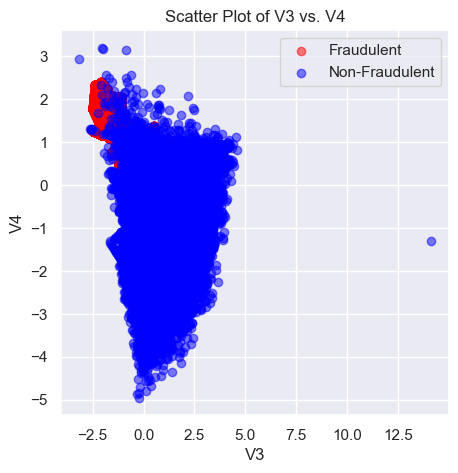

In [60]:
plt.figure(figsize=(5, 5))
plt.scatter(fraudulent['V3'], fraudulent['V4'], c='red', label='Fraudulent', alpha=0.5)
plt.scatter(non_fraudulent['V3'], non_fraudulent['V4'], c='blue', label='Non-Fraudulent', alpha=0.5)
plt.title('Scatter Plot of V3 vs. V4')
plt.xlabel('V3')
plt.ylabel('V4')
plt.legend()
plt.grid(True)
plt.show()

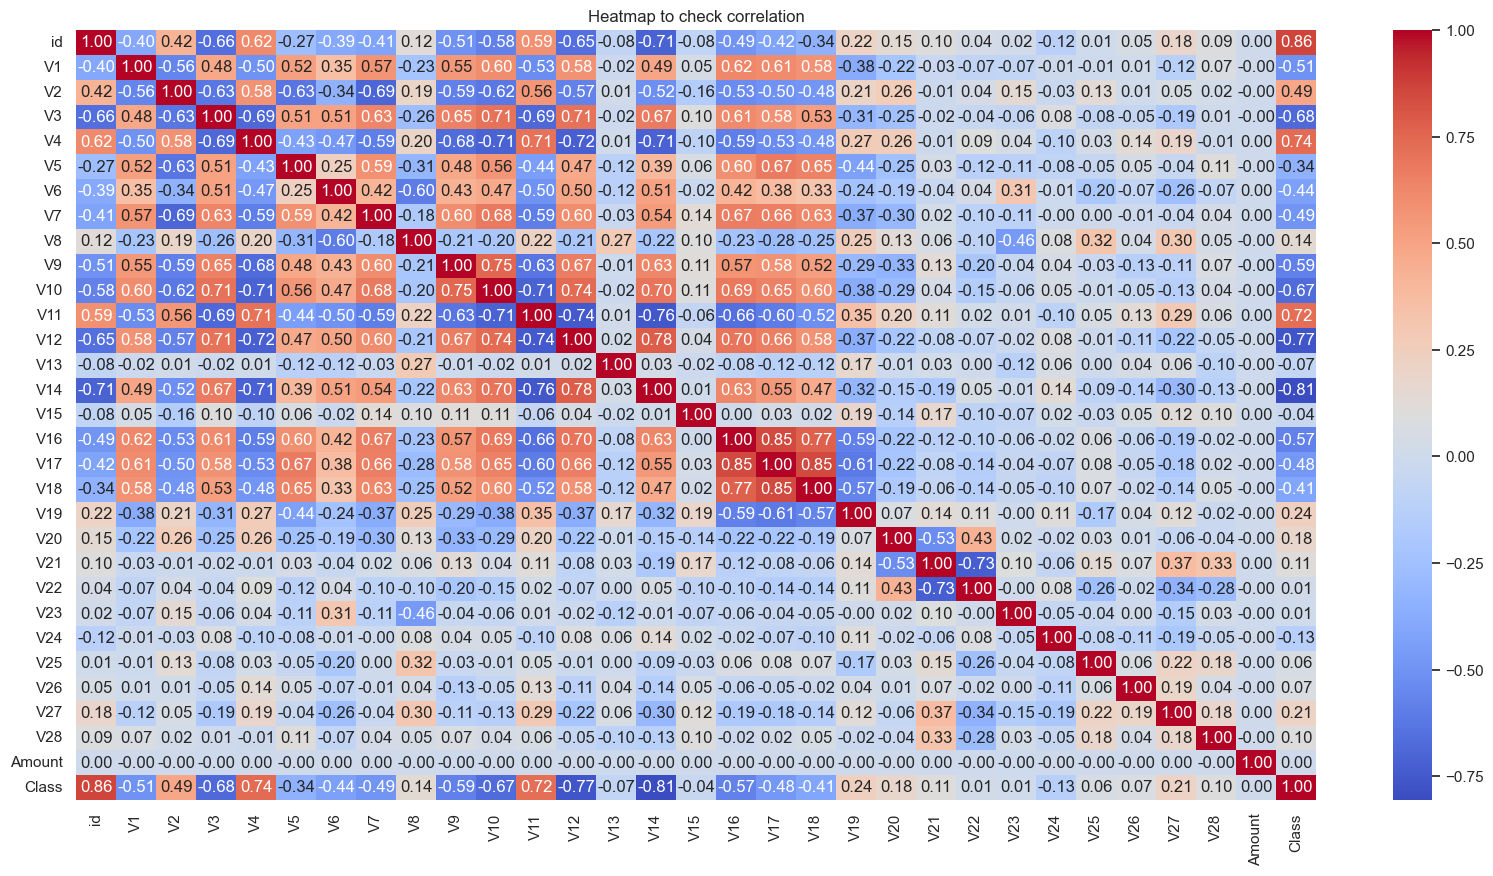

In [59]:
# heatmap to visualize the pairwise correlations between the features
plt.figure(figsize=(20,10)) 
c= df.corr() 
sns.heatmap(c,cmap="coolwarm",annot=True, fmt=".2f") 
plt.title('Heatmap to check correlation')
plt.show()

NameError: name 'X_train' is not defined